<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/mlp_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN-Keras

In [1]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


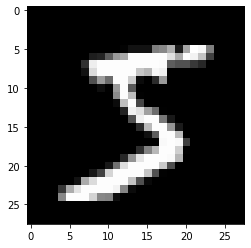

In [2]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.gray()
plt.imshow(X_train[0], cmap='gray')

In [3]:
#check image shape
X_train[0].shape

(28, 28)

In [4]:
#reshape data to fit model
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#create model
model = Sequential()
#add model layers
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.7618 - acc: 0.7707 - val_loss: 0.3650 - val_acc: 0.8938
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.4825 - acc: 0.8504 - val_loss: 0.3283 - val_acc: 0.9004
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.4414 - acc: 0.8636 - val_loss: 0.3043 - val_acc: 0.9069
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.4101 - acc: 0.8717 - val_loss: 0.2783 - val_acc: 0.9140
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.3801 - acc: 0.8815 - val_loss: 0.2557 - val_acc: 0.9222
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.3675 - acc: 0.8854 - val_loss: 0.2590 - val_acc: 0.9185
Epoch 7/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.3449 - acc: 0.8933 - val_loss: 0.2369 - 

In [9]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[5.1148321e-09, 2.7237617e-09, 1.9424504e-06, 1.1690575e-04,
        5.8818769e-11, 1.1850271e-08, 5.1028217e-15, 9.9988031e-01,
        5.3450759e-09, 8.1357149e-07],
       [2.2334024e-07, 2.6691391e-06, 9.9997997e-01, 1.3593456e-05,
        1.2034463e-11, 3.4337677e-07, 1.5121753e-06, 1.6095187e-09,
        1.6656185e-06, 1.2120797e-12],
       [8.2723833e-10, 9.9990976e-01, 1.7877077e-05, 1.1719966e-06,
        5.0336930e-06, 1.2889037e-06, 3.9586300e-07, 6.1857791e-05,
        2.5692971e-06, 1.6172963e-08],
       [9.9957746e-01, 3.1511249e-07, 2.9046363e-05, 1.6299679e-06,
        9.9183910e-07, 3.3762383e-06, 9.0841982e-05, 1.3998627e-04,
        9.0500674e-07, 1.5545567e-04]], dtype=float32)

In [10]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
pesos = model.layers[0].get_weights()[0]
pesos.shape
pesos[:,:,0,0] #first weight generated.

IndexError: ignored